<a href="https://colab.research.google.com/github/Jjmorenog/SimulacionUllanos2023/blob/main/2do_ParcialJuanMoreno_2PA_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2do Parcial - Simulación Computacional 2PA-2023
Noviembre 20 de 2023 - Máxima hora de entrega: 10:00 am

*Subir a Moodle el archivo .ipynb desarrollado y ejecutado*

## 1. (1.6 puntos)
De acuerdo con el ejemplo de Jupyter Notebook de Python en Google Colab [Sistema de línea de espera con un servidor - G/G/1.ipynb](https://colab.research.google.com/drive/1BfyF8giQJN4K9I__rRM-vGMLK1p-sYs_?usp=sharing) que implementa el modelo del sistema de línea de espera con un servidor (G/G/1) de la subsección 5.5.1. [Sec. 5.5.1 Rios08] del Capítulo 5 del libro de [Rios08], y los siguientes dos escenarios:

*   **Escenario A:** Ejecute la simulación del ejemplo con un tiempo de simulación T=100 y para que la variable aleatoria de los tiempos entre llegadas sea una distribución de probabilidad exponencial con un λ=6 y para que la variable aleatoria del tiempo de atención en el servidor sea una distribución de probabilidad exponencial con un λ=4.

*   **Escenario B:** Modifique la implementación de ejemplo para que la variable aleatoria de los tiempos entre llegadas sea una distribución de probabilidad exponencial con un λ=2 y para que la variable aleatoria del tiempo de atención en el servidor sea una distribución de probabilidad gaussiana (normal) con μ=3 y $\sigma=1$.

Para cada uno de los escenarios responda las siguientes preguntas:


**a)** ¿Cuál es el tiempo medio de los clientes en el sistema?<br>
**b)** ¿Cuál es el tiempo medio de los clientes en la cola?<br>
**c)** ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?<br>
**d)** ¿Cuál es el número máximo de clientes en el sistema?<br>
**e)** ¿Cuál es el total de clientes que pasaron por el sistema?<br>

**f)** Ejecute ahora 10 veces cada uno de los dos escenarios (A y B) y calcule el promedio y desviación estandar de cada una de las cinco medidas de desempeño anteriores y presentelas en una tabla de la siguiente forma:




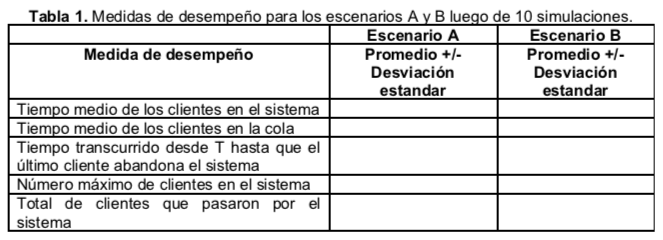

**g)** ¿Qué puede analizar de los resultados comparando los dos escenarios?<br>

Librerias

In [ ]:
%matplotlib inline

!pip install simpy

import simpy #Importar simpy

import numpy as np
import math
import matplotlib.pyplot as plt
import time
import random
from scipy import integrate
import scipy.stats as stats
import pandas as pd

Variables

In [ ]:
Xant1 = 434287492
Xant2 = 514324426

M = 99999.0
T = 100.0
at = []
an = []
LLt = []
St = []

Generar funciones

In [ ]:
def gencongru1():
    global Xant1
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarXA():
    vlambda = 6
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarYA():
    vlambda = 4
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def LlegadaA(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)

    NLL = NLL + 1
    LL.append(t)

    X = GenerarXA()

    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarYA()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y
        Serv.append(Y)

def ServidorA(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1

    St.append(t)
    at.append(t)
    an.append(n)

    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarYA()
        TSuc['tS'] = t + Y
        Serv.append(Y)

def GenerarXB():
    vlambda = 2
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarYB():
    mu = 3
    sigma = 1
    Y = np.random.normal(mu, sigma)
    if Y < 0:
        Y = 0
    return Y

def LlegadaB(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)

    NLL = NLL + 1
    LL.append(t)

    X = GenerarXB()

    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarYB()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y
        Serv.append(Y)

def ServidorB(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1

    St.append(t)
    at.append(t)
    an.append(n)

    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarYB()
        TSuc['tS'] = t + Y
        Serv.append(Y)

Definir funcion generar escenario A

In [ ]:
def run_scenario_A():
    global n, NLL, NS, t, S, Serv, LL, at, an, TSuc
    t = tsuc = NLL = NS = n = 0
    at.append(t)
    an.append(n)

    TSuc = {"tLL": M, "tS": M}

    LL = []
    S = []
    Serv = []
    LL.append(0.0)
    S.append(0.0)
    Serv.append(0.0)
    X = GenerarXA()

    if X > T:
        Tp = t_med_sistema = t_med_cola = 0.0
    else:
        LlegadaA(X)
        while (TSuc['tLL'] != M) or (TSuc['tS'] != M):
            if TSuc['tLL'] < TSuc['tS']:
                tsuc = TSuc['tLL']
                TSuc['tLL'] = M
                LlegadaA(tsuc)
            if TSuc['tS'] < TSuc['tLL']:
                tsuc = TSuc['tS']
                TSuc['tS'] = M
                ServidorA(tsuc)
        Tp = max(0, t - T)
        acumulo1 = acumulo2 = 0.0
        ind = 0
        while ind < NLL:
            acumulo1 = acumulo1 + S[ind] - LL[ind]
            acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
            ind = ind + 1
        t_med_sistema = acumulo1 / NLL
        t_med_cola = acumulo2 / NLL
        at.append(t)
        an.append(n)
    return t_med_sistema, t_med_cola, Tp, max(an), NLL



Mostrar los resultados del escenario A, iterar 10 veces el escenario A y guardar los resultados.
Aca se da respuesta a las preguntas para el escenario A:

a) ¿Cuál es el tiempo medio de los clientes en el sistema?

b) ¿Cuál es el tiempo medio de los clientes en la cola?

c) ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?

d) ¿Cuál es el número máximo de clientes en el sistema?

e) ¿Cuál es el total de clientes que pasaron por el sistema?

In [ ]:
num_iterations = 10
metricas=[]
metricas=run_scenario_A()
print("Tiempo medio de los clientes en el sistema escenario A: ",metricas[0])
print("Tiempo medio de los clientes en la cola escenario A: ",metricas[1])
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema escenario A: ",metricas[2])
print("Número máximo de clientes en el sistema escenario A: ",metricas[3])
print("Total de clientes que pasaron por el sistema escenario A: ",metricas[4])
at = []
an = []
scenario_A_results = []
for i in range(num_iterations):
    scenario_A_results.append(run_scenario_A())
at = []
an = []

Tiempo medio de los clientes en el sistema escenario A:  21.21388934862367
Tiempo medio de los clientes en la cola escenario A:  20.96679798477108
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema escenario A:  37.85423722703814
Número máximo de clientes en el sistema escenario A:  176
Total de clientes que pasaron por el sistema escenario A:  556


Definir funcion escenario B

In [ ]:
def run_scenario_B():
    global n, NLL, NS, t, S, Serv, LL, at, an, TSuc
    t = tsuc = NLL = NS = n = 0
    at.append(t)
    an.append(n)

    TSuc = {"tLL": M, "tS": M}

    LL = []
    S = []
    Serv = []
    LL.append(0.0)
    S.append(0.0)
    Serv.append(0.0)
    X = GenerarXB()

    if X > T:
        Tp = t_med_sistema = t_med_cola = 0.0
    else:
        LlegadaB(X)
        while (TSuc['tLL'] != M) or (TSuc['tS'] != M):
            if TSuc['tLL'] < TSuc['tS']:
                tsuc = TSuc['tLL']
                TSuc['tLL'] = M
                LlegadaB(tsuc)
            if TSuc['tS'] < TSuc['tLL']:
                tsuc = TSuc['tS']
                TSuc['tS'] = M
                ServidorB(tsuc)
        Tp = max(0, t - T)
        acumulo1 = acumulo2 = 0.0
        ind = 0
        while ind < NLL:
            acumulo1 = acumulo1 + S[ind] - LL[ind]
            acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
            ind = ind + 1
        t_med_sistema = acumulo1 / NLL
        t_med_cola = acumulo2 / NLL
        at.append(t)
        an.append(n)
    return t_med_sistema, t_med_cola, Tp, max(an), NLL

Mostrar los resultados del escenario B, iterar 10 veces el escenario B y guardar los resultados.
Aca se da respuesta a las preguntas para el escenario B:

a) ¿Cuál es el tiempo medio de los clientes en el sistema?

b) ¿Cuál es el tiempo medio de los clientes en la cola?

c) ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?

d) ¿Cuál es el número máximo de clientes en el sistema?

e) ¿Cuál es el total de clientes que pasaron por el sistema?

In [ ]:
metricas=[]
metricas=run_scenario_B()
print("Tiempo medio de los clientes en el sistema escenario B: ",metricas[0])
print("Tiempo medio de los clientes en la cola escenario B: ",metricas[1])
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema escenario B: ",metricas[2])
print("Número máximo de clientes en el sistema escenario B: ",metricas[3])
print("Total de clientes que pasaron por el sistema escenario B: ",metricas[4])
at = []
an = []
scenario_B_results = []
for i in range(num_iterations):
    scenario_B_results.append(run_scenario_B())

Tiempo medio de los clientes en el sistema escenario B:  205.121711776413
Tiempo medio de los clientes en la cola escenario B:  202.3015762626606
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema escenario B:  410.53239653127577
Número máximo de clientes en el sistema escenario B:  146
Total de clientes que pasaron por el sistema escenario B:  180


Generar tabla de resultados, para dar respuesta al literal F.

f) Ejecute ahora 10 veces cada uno de los dos escenarios (A y B) y calcule el promedio y desviación estandar de cada una de las cinco medidas de desempeño anteriores y presentelas en una tabla de la siguiente forma:

In [ ]:
# Calcula el promedio y la desviación estándar de cada medida de rendimiento para el escenario A
scenario_A_avg = [
    sum(result[0] for result in scenario_A_results) / num_iterations,  # Tiempo medio de los clientes en el sistema
    sum(result[1] for result in scenario_A_results) / num_iterations,  # Tiempo medio de los clientes en la cola
    sum(result[2] for result in scenario_A_results) / num_iterations,  # Tiempo transcurrido desde T hasta que el último cliente abandona el sistema
    sum(result[3] for result in scenario_A_results) / num_iterations,  # Número máximo de clientes en el sistema
    sum(result[4] for result in scenario_A_results) / num_iterations   # Total de clientes que pasaron por el sistema
]

scenario_A_std = [
    (sum((result[0] - scenario_A_avg[0]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[1] - scenario_A_avg[1]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[2] - scenario_A_avg[2]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[3] - scenario_A_avg[3]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[4] - scenario_A_avg[4]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5
]

# Calcula el promedio y la desviación estándar de cada medida de rendimiento para el escenario B
scenario_B_avg = [
    sum(result[0] for result in scenario_B_results) / num_iterations,
    sum(result[1] for result in scenario_B_results) / num_iterations,
    sum(result[2] for result in scenario_B_results) / num_iterations,
    sum(result[3] for result in scenario_B_results) / num_iterations,
    sum(result[4] for result in scenario_B_results) / num_iterations
]

scenario_B_std = [
    (sum((result[0] - scenario_B_avg[0]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[1] - scenario_B_avg[1]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[2] - scenario_B_avg[2]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[3] - scenario_B_avg[3]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[4] - scenario_B_avg[4]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5
]

# Crear la tabla con los resultados
data = {
    'Medida de desempeño': ['Tiempo medio de los clientes en el sistema', 'Tiempo medio de los clientes en la cola',
                             'Tiempo transcurrido desde T hasta que el último cliente abandona el sistema',
                             'Número máximo de clientes en el sistema', 'Total de clientes que pasaron por el sistema'],
    'Escenario A (Promedio)': scenario_A_avg,
    'Escenario A (Desviación estándar)': scenario_A_std,
    'Escenario B (Promedio)': scenario_B_avg,
    'Escenario B (Desviación estándar)': scenario_B_std
}

df = pd.DataFrame(data)

print(df)

                                 Medida de desempeño  Escenario A (Promedio)  \
0         Tiempo medio de los clientes en el sistema               27.666012   
1            Tiempo medio de los clientes en la cola               27.412075   
2  Tiempo transcurrido desde T hasta que el últim...               54.906653   
3            Número máximo de clientes en el sistema              239.200000   
4       Total de clientes que pasaron por el sistema              607.500000   

   Escenario A (Desviación estándar)  Escenario B (Promedio)  \
0                           2.512710              246.889031   
1                           2.511922              243.936970   
2                           6.350358              495.489473   
3                           7.922121              186.600000   
4                          26.717971              200.600000   

   Escenario B (Desviación estándar)  
0                          29.758107  
1                          29.744758  
2                

## 2. (1.7 puntos)
Usando la implementación de <a href="https://colab.research.google.com/drive/1dBUOOnaxDZduF-30zj917-4KcJQezCsR?usp=sharing">_Red de Colas_</a>, de acuerdo con lo visto en clase, haga las modificaciones indicadas para responder las respectivas preguntas.




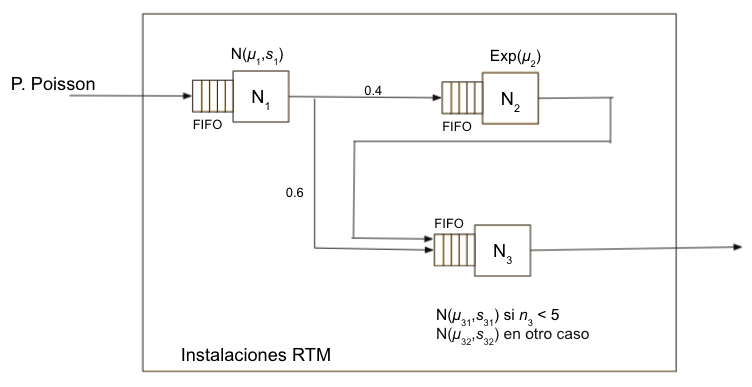

*   Establezca los siguientes parámetros:
$\lambda = 6.0$, $\mu_1 = 2.0$, $s_1 = 1.5$, $\mu_2 = 3.5$, $\mu_{31} = 5.0$, $s_{31} = 3.0$, $\mu_{32} = 3.5$, $s_{32} = 2.0$, y $T = 500$
*   La proporción clientes que pasan del nodo 1 al nodo 2 es del 25%.


Responda las siguientes preguntas:

**a)** ¿Cuál es el tiempo medio de los clientes en el sistema?

**b)** ¿Cuál es el número promedio de clientes para cada uno de los 3 nodos?

**c)** ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?

**d)** ¿Cuál fue el número máximo de clientes en el sistema durante la simulación?

**e)** ¿Cuál fue el total de clientes que pasaron por cada uno de los 3 nodos?

**f)** ¿Cuál fue el total de clientes que pasaron por el sistema?

**g)** Haga un breve análisis de la simulación de acuerdo con los resultados, las respuestas de la preguntas anteriores y la evolución de las gráficas.


Acá se da respuesta a las preguntas:

a) ¿Cuál es el tiempo medio de los clientes en el sistema?

b) ¿Cuál es el número promedio de clientes para cada uno de los 3 nodos?

c) ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?

d) ¿Cuál fue el número máximo de clientes en el sistema durante la simulación?

e) ¿Cuál fue el total de clientes que pasaron por cada uno de los 3 nodos?

f) ¿Cuál fue el total de clientes que pasaron por el sistema?

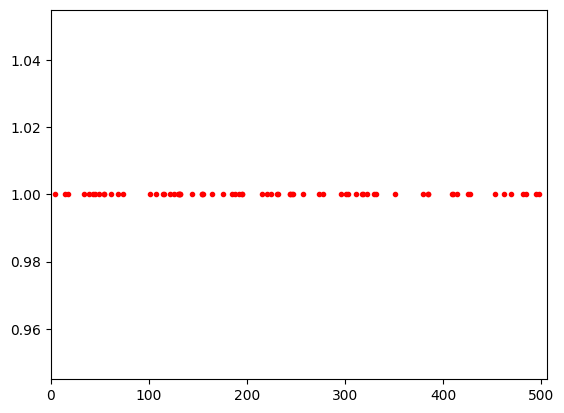

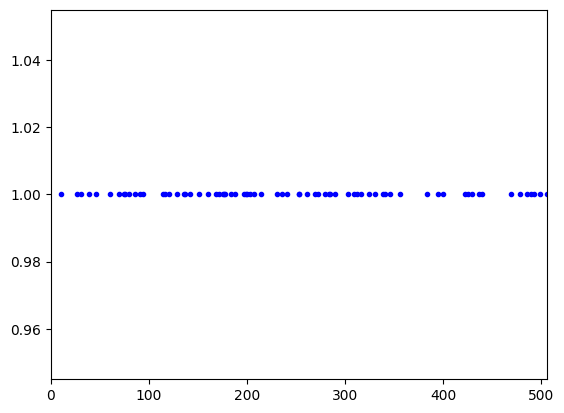

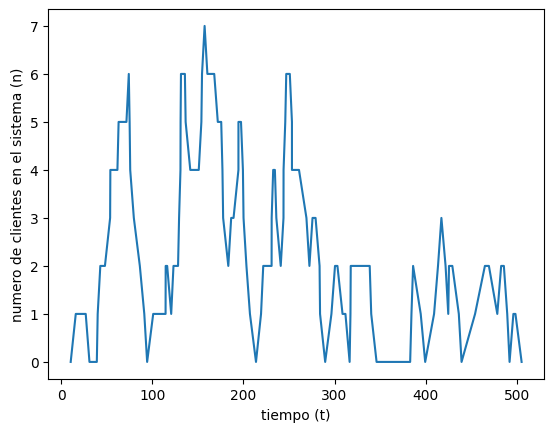

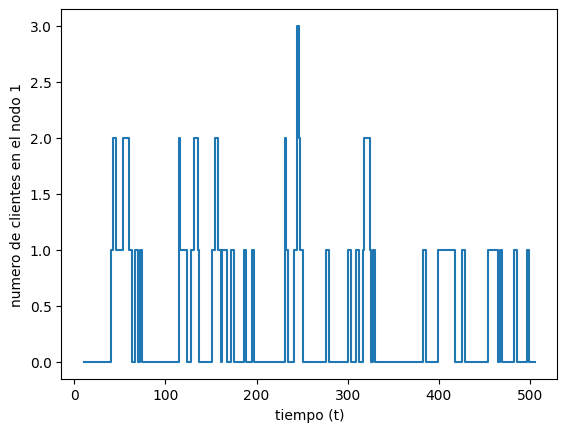

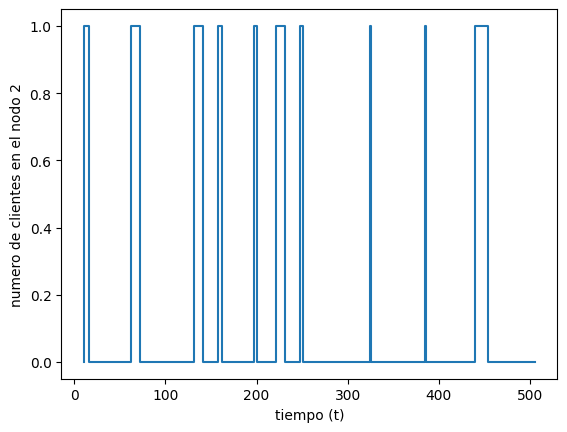

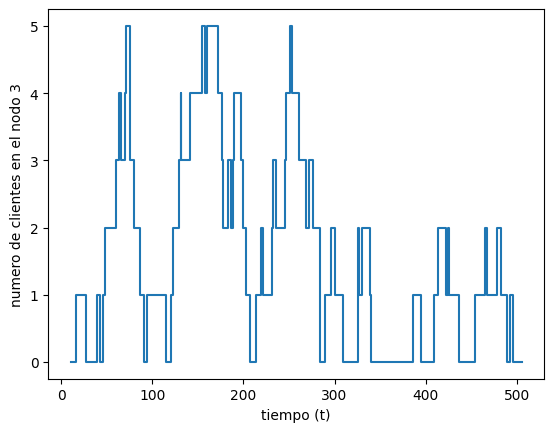

Punto 2
A)Tiempo medio de los clientes en el sistema:  16.82501951860226
B)Número promedio de clientes en el nodo 1:  0.3935165314120401
B)Número promedio de clientes en el nodo 2:  0.049503238850378696
B)Número promedio de clientes en el nodo 3:  1.2535286550036306
C)Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  5.206342920795976
D)Número máximo de clientes en el sistema:  7
E)Total de clientes que pasaron por el nodo 1:  72
E)Total de clientes que pasaron por el nodo 2:  17
E)Total de clientes que pasaron por el nodo 3:  72
F)Total de clientes que pasaron por el sistema:  72


In [ ]:
L = 6.0
mu1 = 2.0
sigma1 = 1.5
mu2 = 3.5
mu31 = 5.0
sigma31 = 3.0
mu32 = 3.5
sigma32 = 2.0


def Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc):
    n_med_n1 = n_med_n1 + n1 * (tsuc - t)
    n1 = n1 + 1

    LLt.append(tsuc)

    NLL1 = NLL1 + 1
    LL1.append(tsuc)
    t = tsuc

    Y = np.random.exponential(L)

    if (t + Y) < T:
        TSuc['tLL1'] = t + Y
    if n1 == 1:
        Y = np.random.normal(mu1, sigma1)
        if Y < 0:
            Y = 0
        TSuc['tS1'] = t + Y

    return n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc

def Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3):
    n_med_n1 = n_med_n1 + n1 * (tsuc - t)
    n1 = n1 - 1

    NS1 = NS1 + 1
    S1.append(tsuc)
    U = np.random.uniform(0, 1)
    if U <= 0.25:
        n_med_n2 = n_med_n2 + n2 * (tsuc - t)
        n2 = n2 + 1

        NLL2 = NLL2 + 1
        LL2.append(tsuc)
        if n2 == 1:
            Z = np.random.exponential(mu2)
            TSuc['tS2'] = tsuc + Z
    else:
        n_med_n3 = n_med_n3 + n3 * (tsuc - t)
        n3 = n3 + 1

        NLL3 = NLL3 + 1
        LL3.append(tsuc)
        if n3 == 1:
            W = np.random.normal(mu31, sigma31)
            if W < 0:
                W = 0
            TSuc['tS3'] = tsuc + W
    t = tsuc
    if n1 > 0:
        S = np.random.normal(mu1, sigma1) # Valores del escenario
        if S < 0:
            S = 0
        TSuc['tS1'] = tsuc + S

    return t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3

def Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3):
    n_med_n2 = n_med_n2 + n2 * (tsuc - t)
    n2 = n2 - 1

    NS2 = NS2 + 1
    S2.append(tsuc)
    if n2 > 0:
        Y = np.random.exponential(mu2) # Valores del escenario
        TSuc['tS2'] = tsuc + Y
    n_med_n3 = n_med_n3 + n3 * (tsuc - t)
    n3 = n3 + 1

    NLL3 = NLL3 + 1
    LL3.append(tsuc)
    if n3 == 1:
        W = np.random.normal(mu31, sigma31)
        if W < 0:
            W = 0
        TSuc['tS3'] = tsuc + W
    t = tsuc

    return t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3

def Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc):
    n_med_n3 = n_med_n3 + n3 * (tsuc - t)
    n3 = n3 - 1

    St.append(tsuc)

    NS3 = NS3 + 1
    S3.append(tsuc)
    if n3 > 0:
        if n3 < 5:
            R = np.random.normal(mu31, sigma31) # Valores escenario
        else:
            R = np.random.normal(mu32, sigma32) # Valores escenario
        if R < 0:
            R = 0
        TSuc['tS3'] = tsuc + R
    t = tsuc

    return t, n_med_n3, n3, St, NS3, S3, TSuc

M = 999999.0

at = []
LLt = []
St = []
an1 = []
an2 = []
an3 = []
an = []


T = 500.0

t = tsuc = Tp = 0

NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

n_med_n1 = n_med_n2 = n_med_n3 = 0

TSuc = {"tLL1": M, "tS1": M, "tS2": M, "tS3": M}

LL1 = []
LL2 = []
LL3 = []

S1 = []
S2 = []
S3 = []

X = np.random.exponential(L)

if X > T:
    Tp = t_med_sistema = 0.0
    n_med_n1 = n_med_n2 = n_med_n3 = 0
    exit
else:
    n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(X, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
    while min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) != M:
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tLL1']:
            tsuc = TSuc['tLL1']
            TSuc['tLL1'] = M
            n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS1']:
            tsuc = TSuc['tS1']
            TSuc['tS1'] = M
            t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS2']:
            tsuc = TSuc['tS2']
            TSuc['tS2'] = M
            t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS3']:
            tsuc = TSuc['tS3']
            TSuc['tS3'] = M
            t, n_med_n3, n3, St, NS3, S3, TSuc = Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc)
        at.append(tsuc)
        an1.append(n1)
        an2.append(n2)
        an3.append(n3)
        an.append(n1 + n2 + n3)

    Tp = max(0, t - T)
    acumulo1 = acumulo2 = acumulo3 = 0.0

    ind = 0
    while ind < NLL1:
        acumulo1 = acumulo1 + S1[ind] - LL1[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL2:
        acumulo2 = acumulo2 + S2[ind] - LL2[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL3:
        acumulo3 = acumulo3 + S3[ind] - LL3[ind]
        ind = ind + 1

    t_med_sistema = (acumulo1 / NLL1) + (0.4 * acumulo2 / NLL2) + (acumulo3 / NLL3)

    n_med_n1 = n_med_n1 / t
    n_med_n2 = n_med_n2 / t
    n_med_n3 = n_med_n3 / t

    exit

at = np.array(at)
an1 = np.array(an1)
an2 = np.array(an2)
an3 = np.array(an3)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

#Graficas llegada salida y en el sistema de clientes

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

#graficas nodos

plt.step(at, an1)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 1')
plt.show()

plt.step(at, an2)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 2')
plt.show()

plt.step(at, an3)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 3')
plt.show()


print("Punto 2")
print("A)Tiempo medio de los clientes en el sistema: ", t_med_sistema)
print("B)Número promedio de clientes en el nodo 1: ", n_med_n1)
print("B)Número promedio de clientes en el nodo 2: ", n_med_n2)
print("B)Número promedio de clientes en el nodo 3: ", n_med_n3)
print("C)Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ", Tp)
print("D)Número máximo de clientes en el sistema: ", max(an))
print("E)Total de clientes que pasaron por el nodo 1: ", NS1)
print("E)Total de clientes que pasaron por el nodo 2: ", NS2)
print("E)Total de clientes que pasaron por el nodo 3: ", NS3)
print("F)Total de clientes que pasaron por el sistema: ",NS1)

g) Haga un breve análisis de la simulación de acuerdo con los resultados, las respuestas de la preguntas anteriores y la evolución de las gráficas.

Segun los resultados vemos que el numero de clientes que pasarón por el sistema hasta que se termino el tiempo de simulación fueron de 72 clientes, donde el tiempo que transcurrio desde que se acaba la simulación hasta que el ultimo cliente sale del sistema es de 5.2 y que el numero maximo de clientes que hubo en el sistema en simultaneo fue de 7.
Según las graficas podemos ver que por nodos, el nodo 3 fue que el mayor clientes tuvo en algun momento en el sistema, siendo este numero de 5 clientes, el nodo 2 tenia un comportamiento de atendia cliente, soltaba cliente, sin tener queue, yen en nodo 1 hubo un maximo de 3 clientes en el sistema.

## 3.  (1.7 punto)
Una fabrica nueva cuenta en Villavicencio con 7 maquinas similares que mantienen funcionando 24 horas 7 días a la semana para la producción automatizada de su producto principal: guarapo de piña. Estas máquinas se atascan dañandose periódicamente por su constante carga de trabajo. Las reparaciones son realizadas por un empleado de la fabrica que realizan también otras tareas rutinarias de mantenimiento de las instalaciones. La reparación de las máquinas para ponerlas nuevamente en funcionamiento y producción son prioridad ante las otras tareas de mantenimiento, por lo tanto, cuando se daña una máquina alguno el empleado de mantenimiento debe ocuparse de la reparación de la máquina dañada y luego retomar sus otras tareas .

El tiempo de procesamiento de las máquinas se comporta como una distribución Gaussiana (normal) con media de 12 minutos y desviación estandar de 4 minutos. El tiempo medio entre fallas de las máquinas es de 120 minutos. El tiempo que le toma al empleado de mantenimiento reparar una máquina varia uniformemente entre 25 y 35 minutos. Las otras tareas de mantenimiento que realiza el empleado varian uniformemente entre 20 y 40 minutos.

Se requiere hacer una simulación en Simpy de 2 meses para analizar y responder los siguientes puntos:

**a)** ¿Cuánto sería la producción de unidades de guarapo de piña por cada máquina y en total?.<br>
**b)** ¿Cuánto sería la producción de unidades de guarapo de piña por cada máquina y en total si se compran 3 máquinas adicionales? i.e. para un total de 10 máquinas.<br>
**c)** Si en lugar de comprar más máquines y se pagara por una modificación a las 7 máquinas que permitiera que el tiempo promedio de producción fuera 7 minutos con una desviación de estandar de 2 minutos, pero con un tiempo medio entre fallas de 70 minutos. ¿Cuánto sería la producción de unidades de guarapo de piña por cada máquina y en total?.<br>
**d)** ¿Cuál de los dos escenarios (**b** o **c**) es el más conveniente para mejorar la producción de la fabrica en comparación con el escenario **a**? Explique.

Literal A:

In [ ]:
import random

import simpy


RANDOM_SEED = 42
PT_MEAN = 12.0         # Avg. processing time in minutes
PT_SIGMA = 4.0         # Sigma of processing time
MTTF = 120.0           # Mean time to failure in minutes
BREAK_MEAN = 1 / MTTF  # Param. for expovariate distribution
REPAIR_TIME = np.random.uniform(25, 35)     # Time it takes to repair a machine in minutes
JOB_DURATION = np.random.uniform(20, 40)    # Duration of other jobs in minutes
NUM_MACHINES = 7      # Number of machines in the machine shop
WEEKS = 8              # Simulation time in weeks
SIM_TIME = WEEKS * 7 * 24 * 60  # Simulation time in minutes


def time_per_part():
    """Return actual processing time for a concrete part."""
    return random.normalvariate(PT_MEAN, PT_SIGMA)


def time_to_failure():
    """Return time until next failure for a machine."""
    return random.expovariate(BREAK_MEAN)


class Machine(object):
    """A machine produces parts and my get broken every now and then.

    If it breaks, it requests a *repairman* and continues the production
    after the it is repaired.

    A machine has a *name* and a numberof *parts_made* thus far.

    """
    def __init__(self, env, name, repairman):
        self.env = env
        self.name = name
        self.parts_made = 0
        self.broken = False

        # Start "working" and "break_machine" processes for this machine.
        self.process = env.process(self.working(repairman))
        env.process(self.break_machine())

    def working(self, repairman):
        """Produce parts as long as the simulation runs.

        While making a part, the machine may break multiple times.
        Request a repairman when this happens.

        """
        while True:
            # Start making a new part
            done_in = time_per_part()
            if done_in < 0:
                done_in=done_in*(-1)

            while done_in:
                try:
                    # Working on the part
                    start = self.env.now
                    yield self.env.timeout(done_in)
                    done_in = 0  # Set to 0 to exit while loop.

                except simpy.Interrupt:
                    self.broken = True
                    done_in -= self.env.now - start  # How much time left?

                    # Request a repairman. This will preempt its "other_job".
                    with repairman.request(priority=1) as req:
                        yield req
                        yield self.env.timeout(REPAIR_TIME)

                    self.broken = False

            # Part is done.
            self.parts_made += 1

    def break_machine(self):
        """Break the machine every now and then."""
        while True:
            yield self.env.timeout(time_to_failure())
            if not self.broken:
                # Only break the machine if it is currently working.
                self.process.interrupt()


def other_jobs(env, repairman):
    """The repairman's other (unimportant) job."""
    while True:
        # Start a new job
        done_in = JOB_DURATION
        while done_in:
            # Retry the job until it is done.
            # It's priority is lower than that of machine repairs.
            with repairman.request(priority=2) as req:
                yield req
                try:
                    start = env.now
                    yield env.timeout(done_in)
                    done_in = 0
                except simpy.Interrupt:
                    done_in -= env.now - start


# Setup and start the simulation
print('Produccion de guarapo')
random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
repairman = simpy.PreemptiveResource(env, capacity=1)
machines = [Machine(env, 'Machine %d' % i, repairman)
            for i in range(NUM_MACHINES)]
env.process(other_jobs(env, repairman))

# Execute!
env.run(until=SIM_TIME)

# Analyis/results
contador=0
print('producción de unidades de guarapo de piña en 2 meses' )
for machine in machines:
    print('%s produjo %d unidades de guarapo de piña.' % (machine.name, machine.parts_made))
    contador=contador + machine.parts_made
print('Total de unidades de guarapo de piña producidos: ', contador)


Produccion de guarapo
producción de unidades de guarapo de piña en 2 meses
Machine 0 produjo 3247 unidades de guarapo de piña.
Machine 1 produjo 3212 unidades de guarapo de piña.
Machine 2 produjo 3342 unidades de guarapo de piña.
Machine 3 produjo 3285 unidades de guarapo de piña.
Machine 4 produjo 3328 unidades de guarapo de piña.
Machine 5 produjo 3316 unidades de guarapo de piña.
Machine 6 produjo 3118 unidades de guarapo de piña.
Total de unidades de guarapo de piña producidos:  22848


Literal B

In [ ]:
import random

import simpy


RANDOM_SEED = 42
PT_MEAN = 12.0         # Avg. processing time in minutes
PT_SIGMA = 4.0         # Sigma of processing time
MTTF = 120.0           # Mean time to failure in minutes
BREAK_MEAN = 1 / MTTF  # Param. for expovariate distribution
REPAIR_TIME = np.random.uniform(25, 35)     # Time it takes to repair a machine in minutes
JOB_DURATION = np.random.uniform(20, 40)    # Duration of other jobs in minutes
NUM_MACHINES = 10      # Number of machines in the machine shop
WEEKS = 8              # Simulation time in weeks
SIM_TIME = WEEKS * 7 * 24 * 60  # Simulation time in minutes


def time_per_part():
    """Return actual processing time for a concrete part."""
    return random.normalvariate(PT_MEAN, PT_SIGMA)


def time_to_failure():
    """Return time until next failure for a machine."""
    return random.expovariate(BREAK_MEAN)


class Machine(object):
    """A machine produces parts and my get broken every now and then.

    If it breaks, it requests a *repairman* and continues the production
    after the it is repaired.

    A machine has a *name* and a numberof *parts_made* thus far.

    """
    def __init__(self, env, name, repairman):
        self.env = env
        self.name = name
        self.parts_made = 0
        self.broken = False

        # Start "working" and "break_machine" processes for this machine.
        self.process = env.process(self.working(repairman))
        env.process(self.break_machine())

    def working(self, repairman):
        """Produce parts as long as the simulation runs.

        While making a part, the machine may break multiple times.
        Request a repairman when this happens.

        """
        while True:
            # Start making a new part
            done_in = time_per_part()
            if done_in < 0:
                done_in=done_in*(-1)

            while done_in:
                try:
                    # Working on the part
                    start = self.env.now
                    yield self.env.timeout(done_in)
                    done_in = 0  # Set to 0 to exit while loop.

                except simpy.Interrupt:
                    self.broken = True
                    done_in -= self.env.now - start  # How much time left?

                    # Request a repairman. This will preempt its "other_job".
                    with repairman.request(priority=1) as req:
                        yield req
                        yield self.env.timeout(REPAIR_TIME)

                    self.broken = False

            # Part is done.
            self.parts_made += 1

    def break_machine(self):
        """Break the machine every now and then."""
        while True:
            yield self.env.timeout(time_to_failure())
            if not self.broken:
                # Only break the machine if it is currently working.
                self.process.interrupt()


def other_jobs(env, repairman):
    """The repairman's other (unimportant) job."""
    while True:
        # Start a new job
        done_in = JOB_DURATION
        while done_in:
            # Retry the job until it is done.
            # It's priority is lower than that of machine repairs.
            with repairman.request(priority=2) as req:
                yield req
                try:
                    start = env.now
                    yield env.timeout(done_in)
                    done_in = 0
                except simpy.Interrupt:
                    done_in -= env.now - start


# Setup and start the simulation
print('Produccion de guarapo')
random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
repairman = simpy.PreemptiveResource(env, capacity=1)
machines = [Machine(env, 'Machine %d' % i, repairman)
            for i in range(NUM_MACHINES)]
env.process(other_jobs(env, repairman))

# Execute!
env.run(until=SIM_TIME)

# Analyis/results
contador=0
print('producción de unidades de guarapo de piña en 2 meses' )
for machine in machines:
    print('%s produjo %d unidades de guarapo de piña.' % (machine.name, machine.parts_made))
    contador=contador + machine.parts_made
print('Total de unidades de guarapo de piña producidos: ', contador)

Produccion de guarapo
producción de unidades de guarapo de piña en 2 meses
Machine 0 produjo 3094 unidades de guarapo de piña.
Machine 1 produjo 3252 unidades de guarapo de piña.
Machine 2 produjo 3243 unidades de guarapo de piña.
Machine 3 produjo 3205 unidades de guarapo de piña.
Machine 4 produjo 3179 unidades de guarapo de piña.
Machine 5 produjo 3106 unidades de guarapo de piña.
Machine 6 produjo 3122 unidades de guarapo de piña.
Machine 7 produjo 2994 unidades de guarapo de piña.
Machine 8 produjo 3147 unidades de guarapo de piña.
Machine 9 produjo 3228 unidades de guarapo de piña.
Total de unidades de guarapo de piña producidos:  31570


Literal C

In [ ]:
import random

import simpy


RANDOM_SEED = 42
PT_MEAN = 7.0         # Avg. processing time in minutes
PT_SIGMA = 2.0         # Sigma of processing time
MTTF = 70.0           # Mean time to failure in minutes
BREAK_MEAN = 1 / MTTF  # Param. for expovariate distribution
REPAIR_TIME = np.random.uniform(25, 35)     # Time it takes to repair a machine in minutes
JOB_DURATION = np.random.uniform(20, 40)    # Duration of other jobs in minutes
NUM_MACHINES = 7      # Number of machines in the machine shop
WEEKS = 8              # Simulation time in weeks
SIM_TIME = WEEKS * 7 * 24 * 60  # Simulation time in minutes


def time_per_part():
    """Return actual processing time for a concrete part."""
    return random.normalvariate(PT_MEAN, PT_SIGMA)


def time_to_failure():
    """Return time until next failure for a machine."""
    return random.expovariate(BREAK_MEAN)


class Machine(object):
    """A machine produces parts and my get broken every now and then.

    If it breaks, it requests a *repairman* and continues the production
    after the it is repaired.

    A machine has a *name* and a numberof *parts_made* thus far.

    """
    def __init__(self, env, name, repairman):
        self.env = env
        self.name = name
        self.parts_made = 0
        self.broken = False

        # Start "working" and "break_machine" processes for this machine.
        self.process = env.process(self.working(repairman))
        env.process(self.break_machine())

    def working(self, repairman):
        """Produce parts as long as the simulation runs.

        While making a part, the machine may break multiple times.
        Request a repairman when this happens.

        """
        while True:
            # Start making a new part
            done_in = time_per_part()
            if done_in < 0:
                done_in=done_in*(-1)

            while done_in:
                try:
                    # Working on the part
                    start = self.env.now
                    yield self.env.timeout(done_in)
                    done_in = 0  # Set to 0 to exit while loop.

                except simpy.Interrupt:
                    self.broken = True
                    done_in -= self.env.now - start  # How much time left?

                    # Request a repairman. This will preempt its "other_job".
                    with repairman.request(priority=1) as req:
                        yield req
                        yield self.env.timeout(REPAIR_TIME)

                    self.broken = False

            # Part is done.
            self.parts_made += 1

    def break_machine(self):
        """Break the machine every now and then."""
        while True:
            yield self.env.timeout(time_to_failure())
            if not self.broken:
                # Only break the machine if it is currently working.
                self.process.interrupt()


def other_jobs(env, repairman):
    """The repairman's other (unimportant) job."""
    while True:
        # Start a new job
        done_in = JOB_DURATION
        while done_in:
            # Retry the job until it is done.
            # It's priority is lower than that of machine repairs.
            with repairman.request(priority=2) as req:
                yield req
                try:
                    start = env.now
                    yield env.timeout(done_in)
                    done_in = 0
                except simpy.Interrupt:
                    done_in -= env.now - start


# Setup and start the simulation
print('Produccion de guarapo')
random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
repairman = simpy.PreemptiveResource(env, capacity=1)
machines = [Machine(env, 'Machine %d' % i, repairman)
            for i in range(NUM_MACHINES)]
env.process(other_jobs(env, repairman))

# Execute!
env.run(until=SIM_TIME)

# Analyis/results
contador=0
print('producción de unidades de guarapo de piña en 2 meses' )
for machine in machines:
    print('%s produjo %d unidades de guarapo de piña.' % (machine.name, machine.parts_made))
    contador=contador + machine.parts_made
print('Total de unidades de guarapo de piña producidos: ', contador)

Produccion de guarapo
producción de unidades de guarapo de piña en 2 meses
Machine 0 produjo 4199 unidades de guarapo de piña.
Machine 1 produjo 4093 unidades de guarapo de piña.
Machine 2 produjo 4097 unidades de guarapo de piña.
Machine 3 produjo 3912 unidades de guarapo de piña.
Machine 4 produjo 4039 unidades de guarapo de piña.
Machine 5 produjo 3993 unidades de guarapo de piña.
Machine 6 produjo 4048 unidades de guarapo de piña.
Total de unidades de guarapo de piña producidos:  28381


Literal D
¿Cuál de los dos escenarios (b o c) es el más conveniente para mejorar la producción de la fabrica en comparación con el escenario a?

Produccion escenario A= 22848

Produccion escenario B= 31570

Produccion escenario C= 28381

Por tanto, podemos decir segun las simulaciones, que es mejor comprar 3 maquinas adicionales (escenario B), para mejorar la produccion con respecto al escenario A.

